# 移动中位数 去异常点

* 我们日常处理的数据可能会有异常值
* 比如有一个商家做促销，那一天销量增加了10倍，这一天的销量就不能用来做预测
* 我们今天就要尝试用移动中位数，去掉异常点
* 我这里在澳洲乘客数据来做示例，假设有一个月的数据增加了10倍
* 我们今天要看一下怎么把这种10倍数据合理的清洗掉

## 读入异常数据，并展示

* 大家可以看到有一个月的数据有 6000 多

In [1]:
import pandas as pd
from datetime import datetime
import cufflinks as cf

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../data/AirPassengersOutlier.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


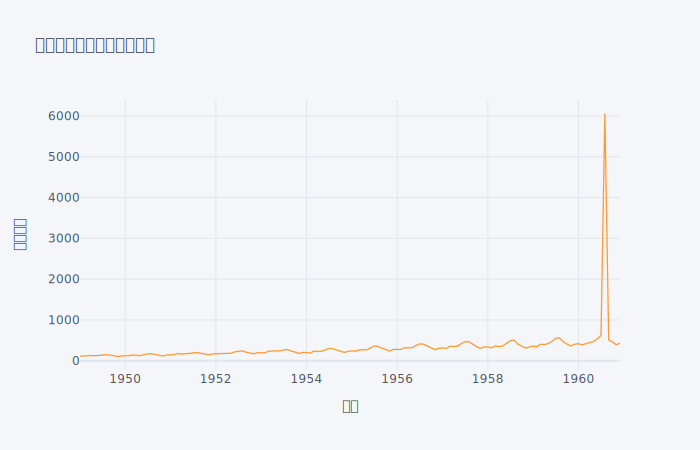

In [2]:
fig = data.iplot(asFigure=True, xTitle="时间",yTitle="乘客数量", title="澳洲航空乘客数量月度数量")
fig.show('svg')

## 查看异常数据的趋势

* 我们把窗口值设成 4,8,12, 跑了3个移动平均数据
* 从图形看，趋势被这个异常点带偏了

  (下面这两步大家一定要做）
* 大家可以把 sma_fig.show('svg') 里的 'svg' 去掉， 再运行代码 
* 这样可以点右上角的每个字段，分别显示，更好的看出问题


In [3]:

sma_data  = data.copy()
sma_data['SMA_Passengers4'] = sma_data['Passengers'].rolling(window=4).mean()
sma_data['SMA_Passengers8'] = sma_data['Passengers'].rolling(window=8).mean()
sma_data['SMA_Passengers12'] = sma_data['Passengers'].rolling(window=12).mean()

sma_data.head()

,Passengers,SMA_Passengers4,SMA_Passengers8,SMA_Passengers12
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN
1949-04-01,129,122.75,NaN,NaN
1949-05-01,121,125.00,NaN,NaN


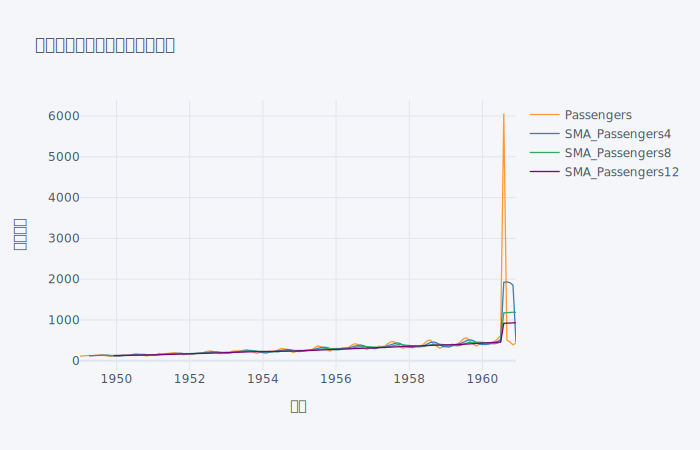

In [4]:
sma_fig = sma_data.iplot(asFigure=True, xTitle="时间",yTitle="乘客数量", title="澳洲航空乘客数量月度数量趋势")
sma_fig.show('svg')

## 通过移动中位数去掉异常值

* 先增加一列 'RMED_Passengers3', 使用移动中位数
* 大家可以把 sma_fig.show('svg') 里的 'svg' 去掉， 再运行代码
* 这样可以点右上角的每个字段，分别显示，更好的看出问题
* 从图形看RMED_Passengers3 和原始的 Passengers 数据很接近了


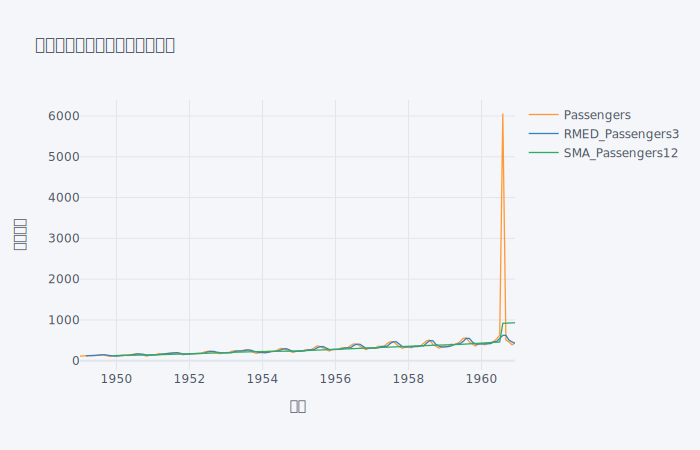

In [7]:

sma_data1  = data.copy()

sma_data1['RMED_Passengers3'] = sma_data1['Passengers'].rolling(window=3).median()
sma_data1['SMA_Passengers12'] = sma_data['Passengers'].rolling(window=12).mean()

sma_data1.head()
sma_fig = sma_data1.iplot(asFigure=True, xTitle="时间",yTitle="乘客数量", title="澳洲航空乘客数量月度数量趋势")
sma_fig.show('svg')

## 通过移动中位数去掉异常值

* 先增加一列 'RMED_Passengers3', 使用移动中位数
* 再根据 RMED_Passengers3 算出移动平均 SMA_Passengers12
* 大家可以把 sma_fig.show('svg') 里的 'svg' 去掉， 再运行代码
* 这样可以点右上角的每个字段，分别显示，更好的看出问题
* SMA_Passengers12 能反应出真实的趋势了

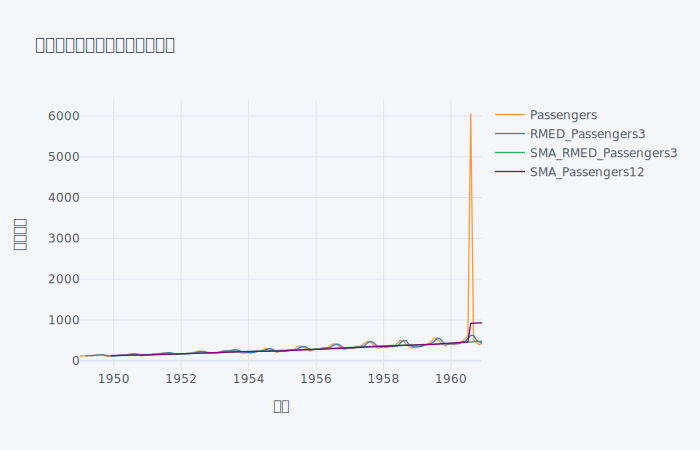

In [9]:
sma_data2  = data.copy()

sma_data2['RMED_Passengers3'] = sma_data2['Passengers'].rolling(window=3).median()
sma_data2['SMA_RMED_Passengers3'] = sma_data2['RMED_Passengers3'].rolling(window=12).mean()
sma_data2['SMA_Passengers12'] = sma_data2['Passengers'].rolling(window=12).mean()

sma_data2.head()
sma_fig = sma_data2.iplot(asFigure=True, xTitle="时间",yTitle="乘客数量", title="澳洲航空乘客数量月度数量趋势")
sma_fig.show('svg')